In [12]:
import random
import numpy as np
import pandas as pd
import pylab as pl
import math
from matplotlib.colors import ListedColormap

#Создание рандомной выборки данных
def generateData (numberOfClassEl, numberOfClasses):
    data = []
    for classNum in range(numberOfClasses):
        #Choose random center of 2-dimensional gaussian
        centerX, centerY = random.random()*5.0, random.random()*5.0
        #Choose numberOfClassEl random nodes with RMS=0.5
        for rowNum in range(numberOfClassEl):
            data.append([ [random.gauss(centerX,0.5), random.gauss(centerY,0.5)], classNum])
    return data

#Демонстрация распределения выборки
def showData (nClasses, nItemsInClass):
    trainData      = generateData (nItemsInClass, nClasses)
    classColormap  = ListedColormap(['#FF0000', '#00FF00', '#FFFFFF'])
    pl.scatter([trainData[i][0][0] for i in range(len(trainData))],
               [trainData[i][0][1] for i in range(len(trainData))],
               c=[trainData[i][1] for i in range(len(trainData))],
               cmap=classColormap)
    pl.show()   

#распределение по признакам
def classifyKNN (trainData, testData, k, numberOfClasses):
    #Euclidean distance between 2-dimensional point
    def dist (a, b):
        return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)
    testLabels = []	
    for testPoint in testData:
        #Claculate distances between test point and all of the train points
        testDist = [ [dist(testPoint, trainData[i][0]), trainData[i][1]] for i in range(len(trainData))]
        #How many points of each class among nearest K
        stat = [0 for i in range(numberOfClasses)]
        for d in sorted(testDist)[0:k]:
            stat[d[1]] += 1
        #Assign a class with the most number of occurences among K nearest neighbours
        testLabels.append( sorted(zip(stat, range(numberOfClasses)), reverse=True)[0][1] )
    return testLabels    
   
#Демонстрация распределенной по классам выборке
#Visualize classification regions
def showDataOnMesh (nClasses, nItemsInClass, k):
    #Generate a mesh of nodes that covers all train cases
    def generateTestMesh (trainData):
        x_min = min( [trainData[i][0][0] for i in range(len(trainData))] ) - 1.0
        x_max = max( [trainData[i][0][0] for i in range(len(trainData))] ) + 1.0
        y_min = min( [trainData[i][0][1] for i in range(len(trainData))] ) - 1.0
        y_max = max( [trainData[i][0][1] for i in range(len(trainData))] ) + 1.0
        h = 0.05
        testX, testY = np.meshgrid(np.arange(x_min, x_max, h),
                                   np.arange(y_min, y_max, h))
        return [testX, testY]
    trainData      = generateData (nItemsInClass, nClasses)
    testMesh       = generateTestMesh (trainData)	
    testMeshLabels = classifyKNN (trainData, zip(testMesh[0].ravel(), testMesh[1].ravel()), k, nClasses)
    classColormap  = ListedColormap(['#FF0000', '#00FF00', '#FFFFFF'])
    testColormap   = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAAA'])
    pl.pcolormesh(testMesh[0],
                  testMesh[1],
                  np.asarray(testMeshLabels).reshape(testMesh[0].shape),
                  cmap=testColormap)
    pl.scatter([trainData[i][0][0] for i in range(len(trainData))],
               [trainData[i][0][1] for i in range(len(trainData))],
               c=[trainData[i][1] for i in range(len(trainData))],
               cmap=classColormap)
    pl.show()







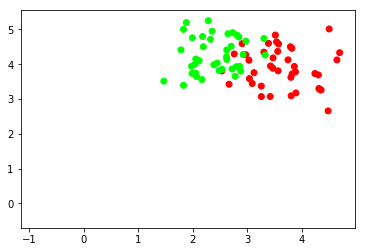

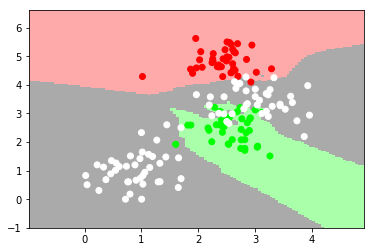

In [15]:
showData (3, 40)
showDataOnMesh(3,40,3)